## A Look at Preferred Writers
The goal of this analysis is to understand the process by which subscribers match up with their preferred writers. The code is <a href=''>here</a>.

In [1]:
from muttscript import *
from muttscript import prepare_and_split, to_numeric
import seaborn as sns
sns.set()

### First Glance
On average we can see that a subscriber gets a new preferred writer every 36 days and every 4.5 posts purchased, on average. I call this value the writer preference frequency (PWF), which can be measured per-post or per-days-active. If we look at these value split out by industry, we can get an idea about which industries tend to prefer writers more often than others.
<br><br> By the looks of it, Insurance has the smallest writer preference frequency. Garden & Floral has the highest, with over five times the number of days between preferred writers as the Insurance industry. Note that, in this plot, industries with a lower value tend to prefer writers more often; smaller is better. The range of values in between gives us a way to roughly rank industries by preferred writer activity.

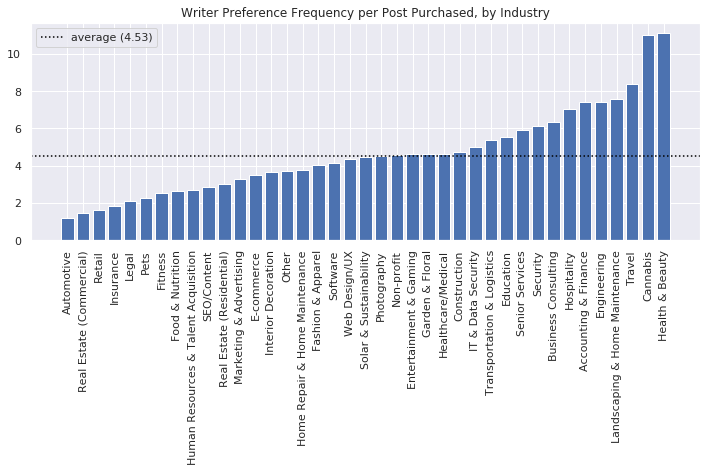

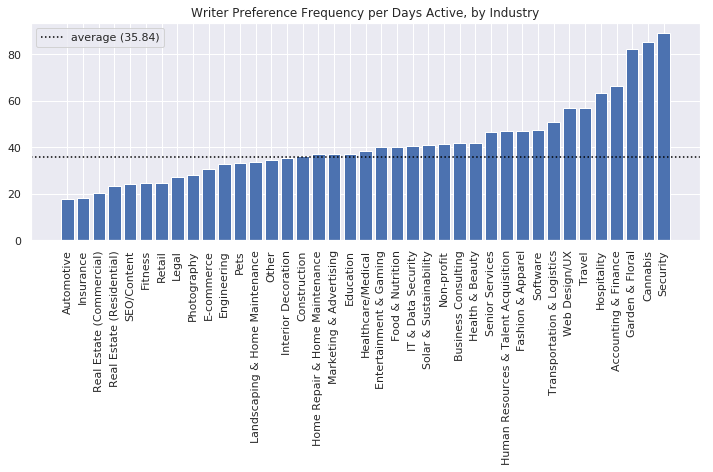

In [2]:
train, test = prepare_and_split('subscriptions.csv')

Looking at both of these rankings, it's clear that the Automotive, Insurance, and Real Estate primary industries are more active in preferring writers than others, while the Cannabis primary industry seems less active in preferring writers, among others.

## Beyond PWF

PWF gives one way to evaluate the subscriber/writer matching process, but it doesn't capture the whole picture. If a subscriber prefers writers more often, it doesn't necessarily mean these relationships are going well.<br><br>
It's difficult to find ways to categorize customers, but I make use of cluster analysis to put our customers into categories. The way we can do this is by converting all of our features into numeric features and performing dimensionality reduction.
### Reducing Dimensions & Clustering
Dimensionality reduction is the process of taking complicated, high-dimensional data and reducing the number of dimensions. In the process, the algorithm (called principal component analysis, or PCA) consolidates dimensions that share information. One example of dimensions that share information are the number lifetime days of a subscription and the number of preferred writers. These two numbers tend to be related; a newer customer has less preferred writers and a longtime customer has more, in a general sense. PCA gives us a way to work with data that is highly correlated like this.<br><br>
After reducing the dimensions, a clustering algorithm can help identity groups of similar subscriptions. We expect certain customers to behave similar to others, so this process gives us a way to look at all the data and say that one set of customers can be described as a self-similar group.<br><br>
This is an unsupervised machine learning algorithm, and machine learning should always include a training and test split. This means we remove some sample of the data for the analysis, fit the model to just one portion, and later test the model on the "held out" data to confirm that the model is doing a good job of generalizing the data. One way to do do this is to make sure that the train group and the test group assign roughly the same number of examples to each cluster.

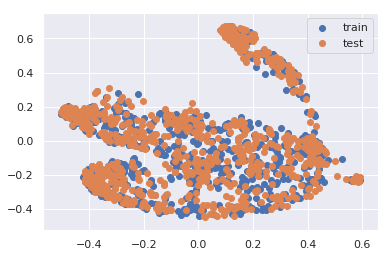

cluster cluster 0 (train) size: 469
cluster cluster 0 (test) size: 437
cluster cluster 1 (train) size: 268
cluster cluster 1 (test) size: 258
cluster cluster 2 (train) size: 106
cluster cluster 2 (test) size: 147
cluster cluster 3 (train) size: 37
cluster cluster 3 (test) size: 37


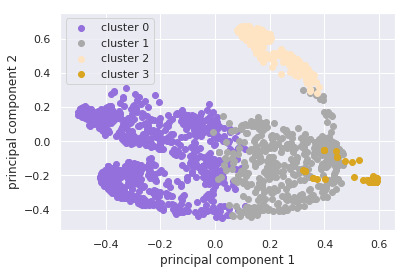

In [3]:
from muttscript import do_clustering

df = do_clustering(train, test, bandwidth=.7)

### Results Look Consistent
The training and test groups tend to behave similarly, which indicates we've found a stable clustering pipeline. These clusters will tend to describe groups of self-similar subscribers. 

### A Look at the Clusters
The particular algorithm I'm using is called mean shift, and it discovers the number of clusters on its own. The algorithm in this case splits our subscriptions into four groups. Here I break down some of the clusters and what they look like.

### Cluster 1

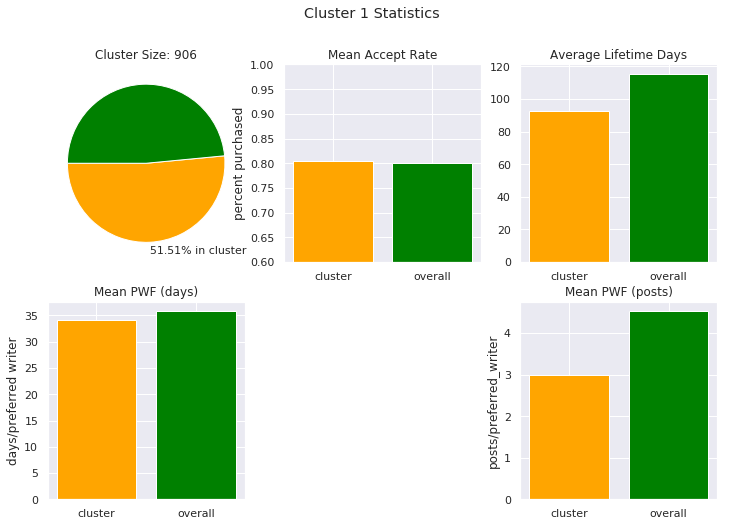

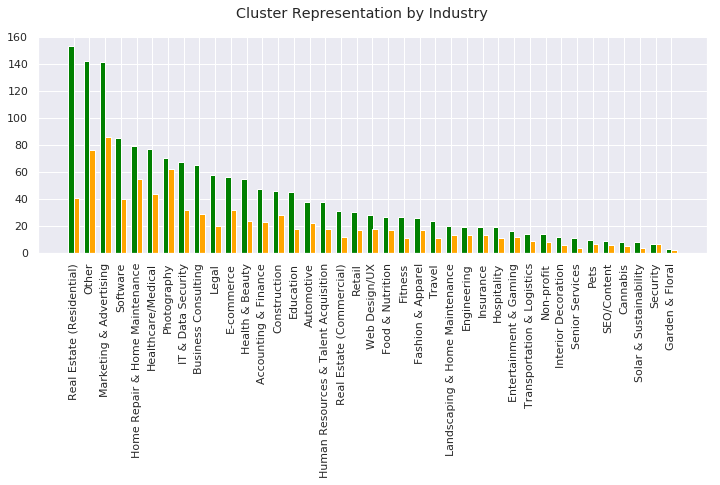

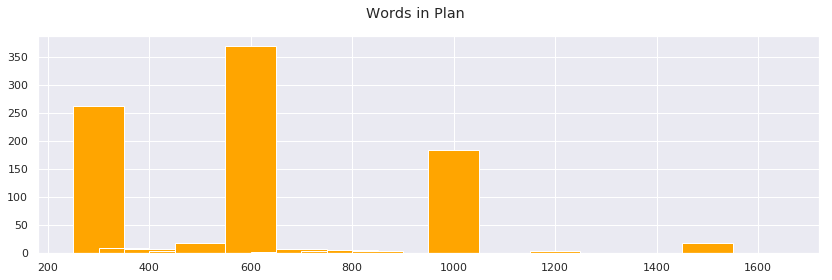

In [5]:
from muttscript import describe_cluster

describe_cluster(df, 0)

This cluster represents over half of the subscriptions in the dataset. They seem to be newer-than-average customers and appear to prefer writers with a slightly higher frequency than others. This may be an indication that newer customers are more actively preferring writers than older ones.

### Cluster 2

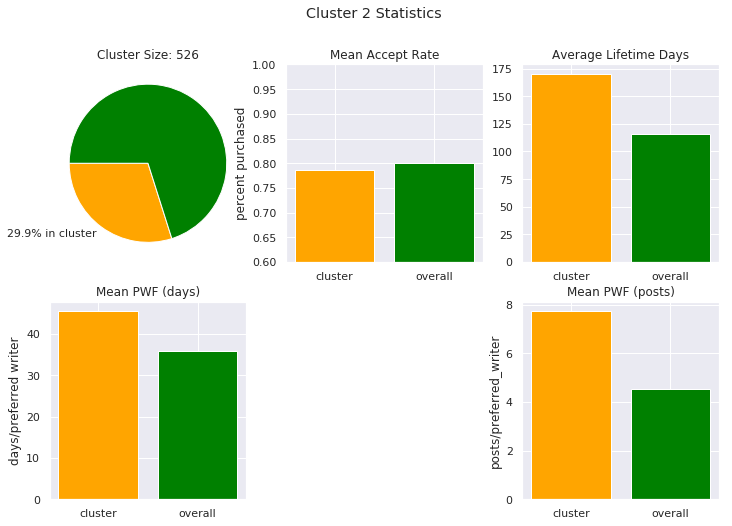

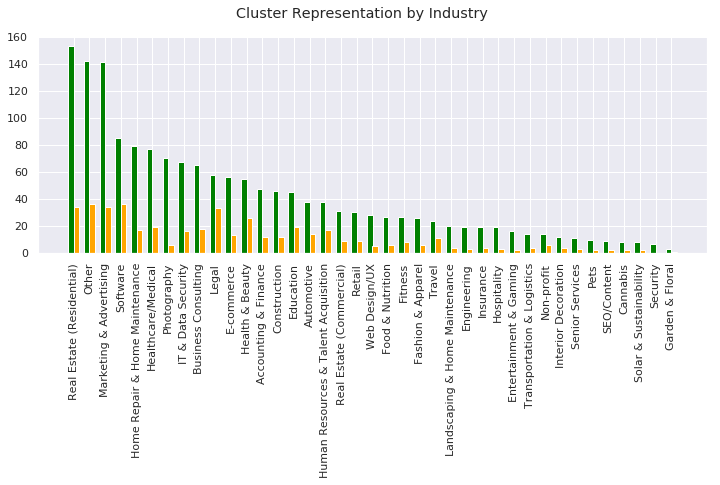

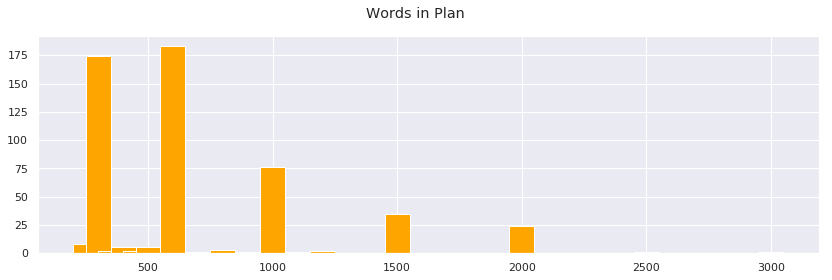

In [6]:
describe_cluster(df, 1)

This cluster appears to be more selective about the posts they purchase, with a lower percent acceptance rate for postings. They also tend to be older subscriptions than the average in this dataset, with an average subscription lifetime of 170 days. One clear trait of this cluster is their higher-than-average PWF, meaning this group tends to prefer less writers. The preferred writer per post frequency is almost double the average of the entire dataset.

### Cluster 3

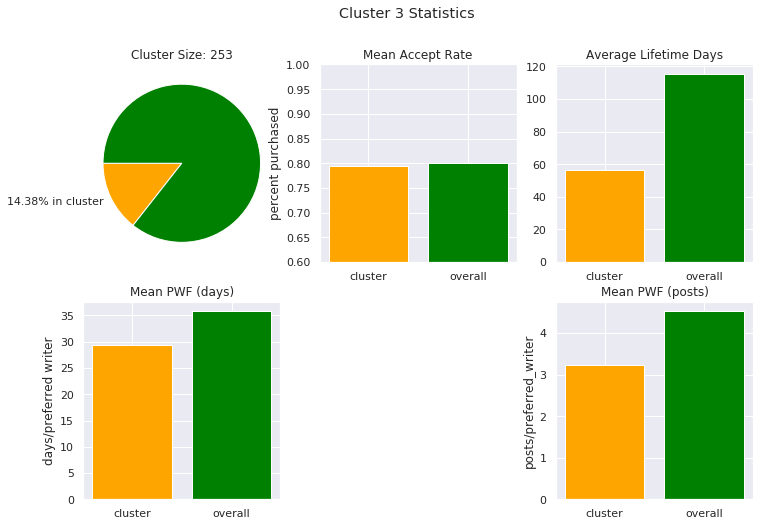

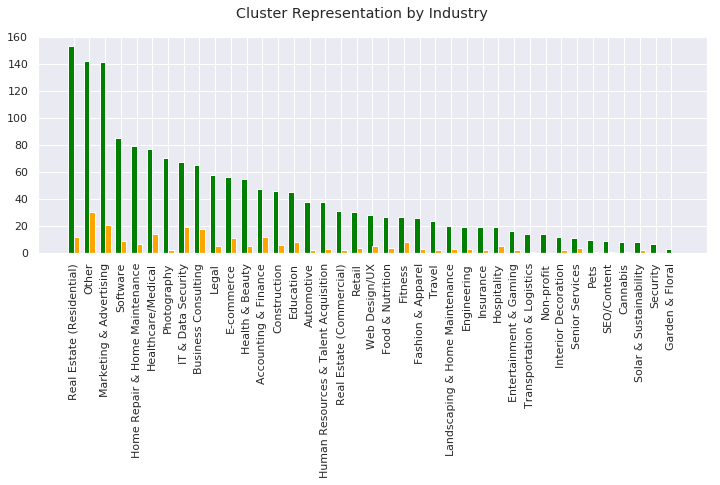

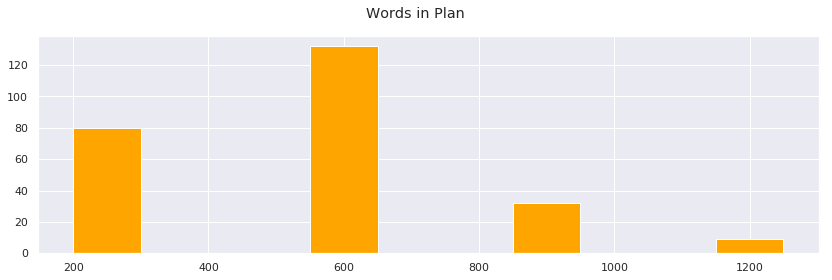

In [7]:
describe_cluster(df, 2)

This appears to be a smaller subset of newer customers. Interestingly, they appear to be slightly more selective than their peers with a smaller accept percantage, but they have a higher average PWF. This suggests these subscribers may be more likely to connect with those writers who connect well with them, while filtering out writers that are not a good match.

### Cluster 4

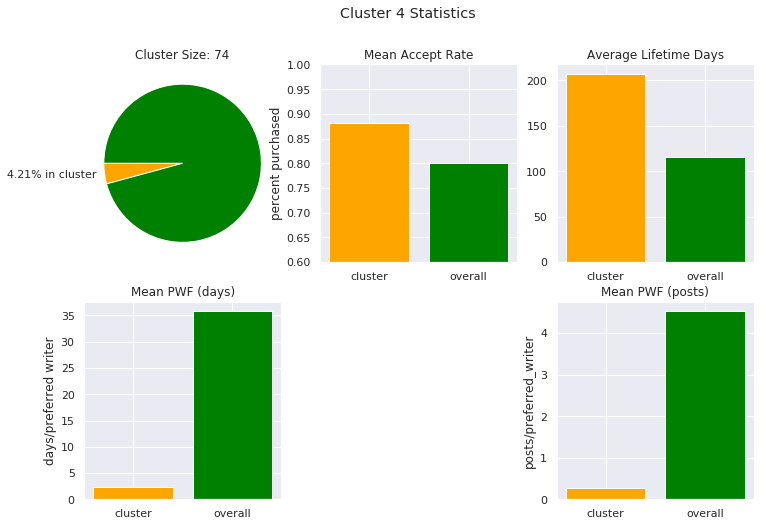

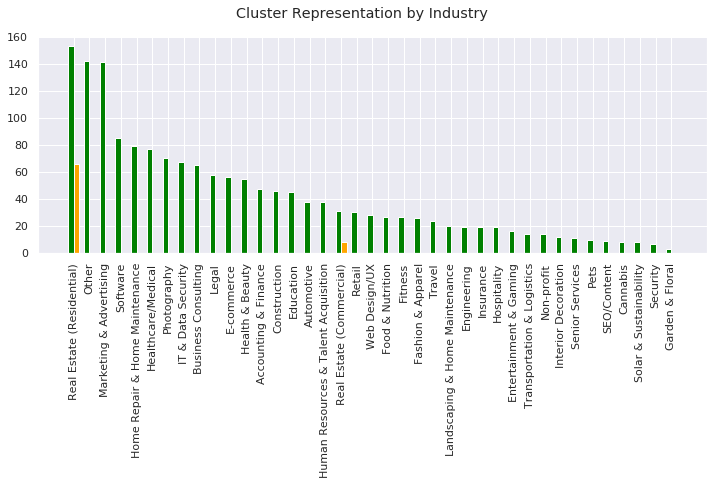

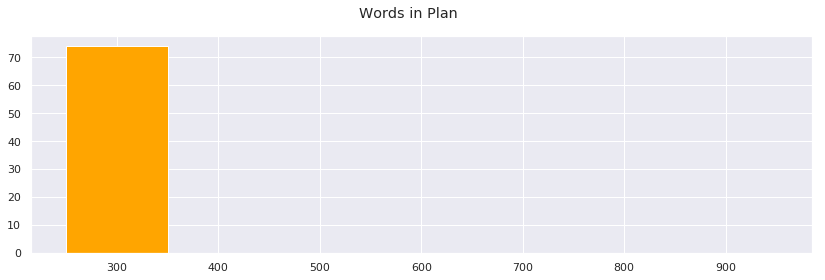

In [8]:
describe_cluster(df, 3)

This group is clearly very active and not very selective. The accept rate is remarkably higher and the PWFs are tiny, suggesting these customers tend to buy many posts and prefer many writers. It's a small cluster, representing less than 5% of all the subscriptions in our dataset. Interestingly, all of these subscriptions come from Real Estate primary industries, both residential and commercial.